<a href="https://colab.research.google.com/github/andiainundzariah/Skripsi/blob/master/Dataset5050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#untuk menghubungkan colab ke drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd #library yg digunakan untk load data set
import numpy as np  #library yg digunakan untk load data set
import os           #library yg digunakan untk load data set serta pengolahan dlm bentuk array

import matplotlib.pyplot as plt #library untuk visualisasi data, untu mmbuat grafik
import cv2    #mengolah data citra dikenal dngn opencv

#library ini ada didlm stckt learn
from sklearn.model_selection import train_test_split  #digunakn untuk membgi data training dan dta testing
from sklearn.preprocessing import StandardScaler      #untuk mrubh skala nilainya
from sklearn.neighbors import KNeighborsClassifier    #library untk knn

#library yg dgunakan untk mnghitung nilai performa
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import math
#library untuk mengolah data/ blm pasti 
from skimage import io
from skimage import feature

In [0]:
pneumonia_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/Pneumonia/')
print(pneumonia_data[:3])   #untuk mncetak hanya dta 3 trkhir sja
print(len(pneumonia_data)) #untuk mngethui bnyknya dt dlm vat

print('\n')
tidakPneumonia_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia/')
print(tidakPneumonia_data[:3])
print(len(tidakPneumonia_data))

['person102_virus_189.jpeg', 'person101_virus_188.jpeg', 'person101_virus_187.jpeg']
500


['IM-0117-0001.jpeg', 'IM-0115-0001.jpeg', 'IM-0183-0001.jpeg']
500


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

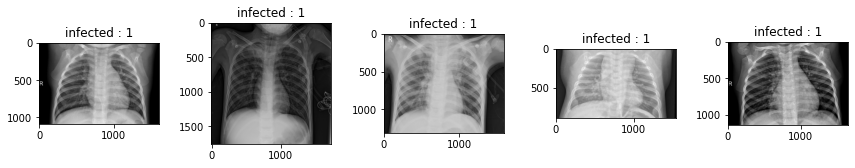

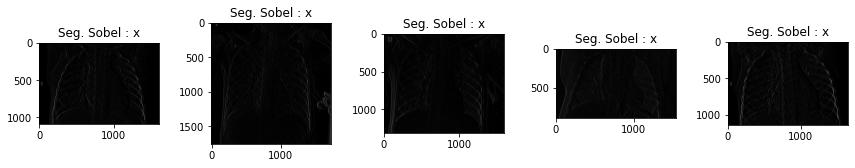

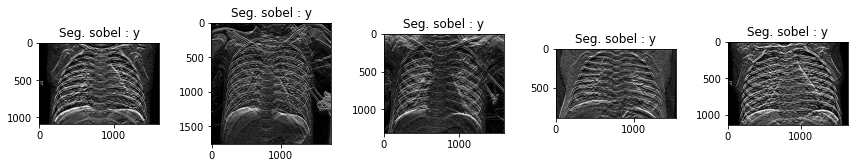

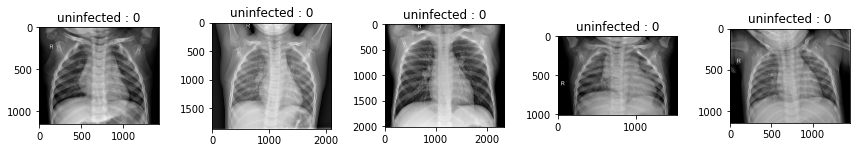

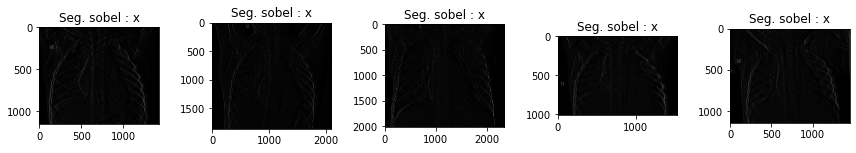

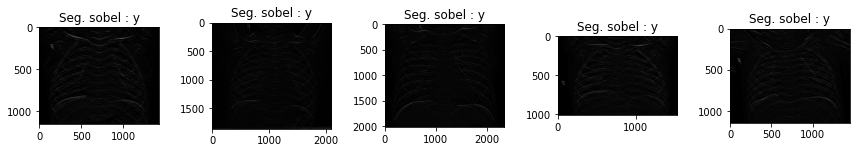

In [0]:
#Tahap ini hanya utk Visualisasi Citra Penyakit Pneumonia
#library matplotlib, hanya u/ visualisasi

#data asli pneumonia
plt.figure(figsize = (12,12))                #mengatur skala citra yg ditmpilkan dengan skala 12 12
for i in range(5):                           #melakukan perulangan sbnyk 5X (dgn nilai awal i=0 sampai i=4)
    plt.subplot(1, 5, i+1)                   #plot letak citra, librry cv2
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" + pneumonia_data[i])
    plt.imshow(img)               #menanmpilkan data dlm format abu2
    plt.title('infected : 1')                  #pmbrian title, 1 itu memberikan nilai actual bahwa terinfeksi itu = 1
    plt.tight_layout()                        #tampilannya disesuaikan dgn lebar layar


#data sobel x pneumonia
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" + pneumonia_data[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)     
    edges = cv2.Sobel(img, cv2.CV_16U,1,0)           #proses segmentasi sobel 
    plt.imshow(edges)
    plt.title('Seg. Sobel : x')
    plt.tight_layout()


#data sobel y
plt.figure(figsize= (12,12))
for i in range (5):
  plt.subplot(1, 5, i+1)
  img = cv2.imread ('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" +pneumonia_data[i])
  gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
  edges = cv2.Sobel (img, cv2.CV_16U,0,1, ksize=5)
  plt.imshow(edges)
  plt.title ('Seg. sobel : y')
  plt.tight_layout()



#Tahap Visualisasi Citra Tidak Pneumonia
#data asli tdk pneumonia
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    plt.imshow(img)
    plt.title('uninfected : 0')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Sobel(img, cv2.CV_16U,1,0)
    plt.imshow(edges)
    plt.title('Seg. sobel : x')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Sobel(img, cv2.CV_16U,0,1)
    plt.imshow(edges)
    plt.title('Seg. sobel : y')
    plt.tight_layout()
    
plt.show()

In [0]:

#SEGMENTASI SOBEL DAN EKSTRAKSI HUMOMENT

x = np.array([['H1','H2','H3','H4','H5','H6','H7','Actual']])    #deklarasi var (x), isi datanya nnti sebagai header file .csv

#Proses Citra Pneumonia
for i in range(len(pneumonia_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" + pneumonia_data[i])
    edges = cv2.Sobel(img,cv2.CV_16U,1,1)
    edges = cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)
    a = cv2.HuMoments(cv2.moments(edges)).flatten() #ektraksi yg dgunakan moment invariant, cv = opencv, edges var isi gmbar
    a = np.append(a,1) #np library untk mngolh data array
    x = np.vstack((x,a))

#Proses Citra Tidak Pneumonia
for i in range(len(tidakPneumonia_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    edges = cv2.Sobel(img,cv2.CV_16U,1,1)
    edges = cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,0)
    x = np.vstack((x,a))

In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/Dataset/DATA5050/DatasetPneumonia5050_16U_XY.csv", x, fmt='%s',delimiter=',' )

In [0]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/Dataset/DATA5050/DatasetPneumonia5050_16U_X.csv')
print (len(dataset))
print (dataset)

1000
           H1        H2            H3  ...            H6            H7  Actual
0    0.024675  0.000045  1.571435e-07  ...  1.736263e-10  1.098377e-15     1.0
1    0.029215  0.000003  6.686187e-07  ... -4.473762e-12  8.947683e-17     1.0
2    0.031341  0.000050  4.044894e-07  ...  3.728895e-10  3.016460e-14     1.0
3    0.023558  0.000155  8.821141e-08  ...  1.260183e-09  9.492399e-16     1.0
4    0.021326  0.000036  1.146714e-07  ...  9.948057e-11 -3.072831e-16     1.0
..        ...       ...           ...  ...           ...           ...     ...
995  0.025194  0.000014  4.376508e-08  ...  2.871323e-11  9.109304e-17     0.0
996  0.026877  0.000014  4.838141e-07  ...  1.297778e-10  2.022251e-15     0.0
997  0.024829  0.000032  3.469644e-07  ...  5.795744e-10  4.255610e-16     0.0
998  0.024332  0.000002  1.616369e-07  ...  3.117725e-11  4.675830e-16     0.0
999  0.022024  0.000012  1.258432e-07  ...  1.510219e-10  1.449797e-15     0.0

[1000 rows x 8 columns]


In [0]:
#split target and attribute (membagi data)
x = dataset.iloc[:, 0:7] #mulai dr colmn index ke0, sbnyk 7 kolom(H1-H7) msuk ke var (X) untuk split data
y = dataset.iloc[:, 7] #hny kolom index ke7 yg msuk ke var (Y)


#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.1)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

print(len(dataset))
x

900
100
900
100
1000


,H1,H2,H3,H4,H5,H6,H7
0,0.024675,0.000045,1.571435e-07,3.025953e-08,1.774124e-15,1.736263e-10,1.098377e-15
1,0.029215,0.000003,6.686187e-07,2.907164e-09,-9.177136e-17,-4.473762e-12,8.947683e-17
2,0.031341,0.000050,4.044894e-07,1.459409e-07,-1.863853e-14,3.728895e-10,3.016460e-14
3,0.023558,0.000155,8.821141e-08,1.015712e-07,9.567339e-15,1.260183e-09,9.492399e-16
4,0.021326,0.000036,1.146714e-07,2.226382e-08,1.082152e-15,9.948057e-11,-3.072831e-16
...,...,...,...,...,...,...,...
995,0.025194,0.000014,4.376508e-08,8.156563e-09,1.243031e-16,2.871323e-11,9.109304e-17
996,0.026877,0.000014,4.838141e-07,4.699705e-08,6.792060e-15,1.297778e-10,2.022251e-15
997,0.024829,0.000032,3.469644e-07,1.040933e-07,1.977773e-14,5.795744e-10,4.255610e-16
998,0.024332,0.000002,1.616369e-07,2.739740e-08,1.762222e-15,3.117725e-11,4.675830e-16


0.0    452
1.0    448
Name: Actual, dtype: int64
1.0    52
0.0    48
Name: Actual, dtype: int64


Text(0.5, 1.0, 'TESTING')

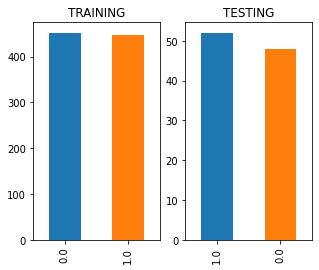

In [0]:
print(y_train.value_counts()) #mnmpilkn jum.data y_train brdsrkn value        

print(y_test.value_counts())  #mnmpilkn jum.data y_test brdsrkn value


plt.figure(figsize=(5,4)) #mngtur ukuran skla grafik

#mnmpilkn visualisasi grafik
plt.subplot(1,2,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TRAINING')
plt.subplot(1,2,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TESTING')

In [0]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)

x_test = sc_x.transform(x_test)
x_train

array([[-0.34373815, -0.60368604, -0.38746325, ..., -0.16351774,
        -0.27310578,  0.07356356],
       [-0.22621552, -0.57010418, -0.37094126, ..., -0.16341649,
        -0.27229394,  0.0742777 ],
       [-0.24528375, -0.21668407, -0.4295014 , ..., -0.16349829,
        -0.26493045,  0.07329047],
       ...,
       [-0.44656527, -0.54799771, -0.41633448, ..., -0.16344277,
        -0.26893085,  0.0729885 ],
       [-0.45524804, -0.13531068, -0.39281857, ..., -0.16336845,
        -0.26137692,  0.07243015],
       [-0.84394833, -0.59757797, -0.40446188, ..., -0.1635173 ,
        -0.27226448,  0.07369336]])

In [0]:
math.sqrt(len(y_train))

30.0

In [0]:
#choose method knn and fitting
classifier = KNeighborsClassifier(n_neighbors=30,p=2,metric='manhattan')
classifier.fit (x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [0]:
#proses testing

#hasil prediksi/testing dismpn ke (y_pred)
y_pred = classifier.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.])

In [0]:
#print result
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("Akurasi :" , accuracy_score(y_test, y_pred))
print("presisi :" , precision_score(y_test, y_pred, average=None))
print("recall :" , recall_score(y_test, y_pred, average=None))
print("F-Measure :" , f1_score(y_test, y_pred, average=None))

[[46  2]
 [16 36]]
Akurasi : 0.82
presisi : [0.74193548 0.94736842]
recall : [0.95833333 0.69230769]
F-Measure : [0.83636364 0.8       ]


In [0]:
from matplotlib import pyplot as plt
x = ["K3", "K4", "K5", "K6", "K7", "K8", "K9", "K10"]
a = [79, 82, 84, 81, 83, 82, 81, 84]
p = [73, 83, 75, 78, 76, 78, 72, 80]
r = [81, 75, 96, 80, 90, 81, 91, 84]
f = [77, 79, 84, 79, 83, 80, 81, 82]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("Grafik Result")
plt.xlabel("Nilai K")
plt.ylabel("Performa")
plt.legend(["Akurasi", "Presisi", "Recall", "F-measure"])
plt.grid()
plt.show()

In [0]:
akurasi = 0
for x in range(2,900): 
    #choose method and fitting
    classifier = KNeighborsClassifier(n_neighbors=x,p=2,metric='euclidean')
    classifier.fit(x_train, y_train)

    #testing data
    y_pred = classifier.predict(x_test)

    #print result
    cm = confusion_matrix(y_test, y_pred)
    tertinggi = accuracy_score(y_test, y_pred)
    if tertinggi >= akurasi:
        akurasi = tertinggi
        cmx = cm
        k = x
        a = accuracy_score(y_test, y_pred)
        p = precision_score(y_test, y_pred,average=None)
        r = recall_score(y_test, y_pred,average=None)
        f = f1_score(y_test, y_pred,average=None)
print("K :" , k)
print(cmx)
print("Akurasi :" , a)
print("presisi :" , p)
print("recall :" , r)
print("F-Score :" , f)
print("--------------------------------------------")

K : 4
[[46  2]
 [14 38]]
Akurasi : 0.84
presisi : [0.76666667 0.95      ]
recall : [0.95833333 0.73076923]
F-Score : [0.85185185 0.82608696]
--------------------------------------------
